#**데이터 전처리**
파이썬 머신러닝 완벽가이드 pg. 116(134)~144(162)


---
<목차>

05. 데이터 전처리
  - 데이터 인코딩 (레이블 인코딩, 원-핫 인코딩)
  - 피처 스케일링과 정규화 (표준화, 정규화)
  - StandardScaler
  - MinMaxScaler
  - 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

06. 사이킷런으로 수행하는 타이타닉 생존자 예측

07. 정리
---

<개념정리>
- 데이터 전처리란?: 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리하는 것

 1. 오류 데이터의 보정이나 **결손값(Null) 처리** 등의 데이터 클렌징 작업:
   
   *df['column'].fillna(0, inplace=True)*

 2. **인코딩** 작업:
   - 레이블 인코딩 (LabelEncoder): 카테고리 피처를 코드형 숫자 값으로 변환

   - 원-핫 인코딩 (OneHotEncoder): 행 형태로 되어있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시.

 3. 데이터의 **스케일링**/정규화 작업: 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것

   - 표준화 (StandardScaler): 개별 피처를 평균이 0이고, 분산이 1인 가우시안 정규 분포를 가질 수 있도록 데이터를 변환

   - 정규화 (MinMaxScaler): 데이터값을 0과 1 사이의 범위 값으로 변환

 4. 알고리즘에 **불필요한 피처 제거** 작업:

    *df.drop([' ',' ',' '], axis=1, inplace=True)*


<유의점>
* OneHotEncoder클래스의 fit(), transform()은 Numpy의 ndarry이든, DataFrame이든 상관없이 입력값으로 2차원 이상의 데이터를 가져야함. 1차원 array일 경우에 .reshape(-1,1)로 차원변경하기. 또한, print(oh_labels.toarray())를 해줌으로써 희소행렬에서 밀집행렬로 변환해야함.

* 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

   가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리하고, 이것이 여의치 않다면 테스트 데이터 변환 시에는 fit( )이나 fit_transform( )을 적용하지 않고 학습 데이터로 이미 fit( ) 된 Scaler 객체를 이용해 transform( )으로 변환해야한다.

* 데이터 세트에서 Null값의 개수를 알기 위해선 df.isnull().sum().sum()을 실행.

* 메소드 별 필요한 인수 재정리
  - *kfold = KFold(n_splits=5)*

    *for train_index, test_index from kfold.split(X_titanic_df)*

  - *cross_val_score(dt_ctf, X_titanic_df, y_titanic_df, cv=5)*

  - *GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)*


* GridSearchCV클래스 객체의 메소드들
grid_dclf.best_params_  # 최적의 하이퍼 파라미터 조합
grid_dclf.best_score_  # 그때의 최고 정확도
grid_dclf.best_estimator_  # 최적의 하이터 파라미터로 학습된 Estimator 모델

* 'Cabin'칼럼의 앞 문자만 추출

   *df['Cabin'].str[：1]*

* enumerate() 내장함수: 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받았을 때, 인덱스와 값을 포함하여 리턴
> *for i, letter in enumerate(['A', 'B', 'C']):*
...     *print(i, letter)*
...
         0 A
         1 B
         2 C

* barplot의 y축 자리에 숫자형 칼럼이 올 경우 저절로 평균이 계산되어 자리함.

---

<코드>

In [33]:
import sklearn

**5. 데이터 전처리**

1.  **데이터 인코딩 - *레이블 인코딩 (Label Encoding)***

   카테고리 피처를 코드형 숫자 값으로 변환



In [34]:
from sklearn.preprocessing import LabelEncoder
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()와 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [35]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [36]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- **데이터 인코딩 - 원-핫 인코딩 (One-Hot Encoding)**

   행 형태로 되어있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시.

In [37]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해서 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [38]:
# 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환해주는 API get_dummies()
import pandas as pd
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


- **피처 스케일링과 정규화 - *StandardScaler***

In [39]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()와 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('feature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- **피처 스케일링과 정규화 - *MinMaxScaler***

In [41]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()와 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- ***학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**

   머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다.

   따라서, 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리하고, 이것이 여의치 않다면 테스트 데이터 변환 시에는 fit( )이나 fit_transform( )을 적용하지 않고 학습 데이터로 이미 fit( )
된 Scaler 객체를 이용해 transform( )으로 변환해야한다.

In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지의 값을 갖는 데이터세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scaled된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scaled된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [43]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력. .reshape(-1)는 1차원 배열로 변환시켜줌.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scaled된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scaled된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [44]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaler = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scaled된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


**6. 사이킷런으로 수행하는 타이타닉 생존자 예측**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
titanic_df = pd.read_csv('/content/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [47]:
print('\n ###학습 데이터 정보###\n')
print(titanic_df.info())


 ###학습 데이터 정보###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [48]:
# 데이터 클렌징 작업
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null값 개수:', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수: 0


In [49]:
# Sex, Cabin, Embarked 칼럼들의 분포 살펴보기
print('Sex 값 분포:\n', titanic_df.Sex.value_counts())
print('\nCabin 값 분포:\n', titanic_df.Cabin.value_counts())
print('\nEmbarked 값 분포:\n', titanic_df.Embarked.value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

Cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [50]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]
print(titanic_df.Cabin.head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [51]:
# 성별에 따른 생존자 수
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

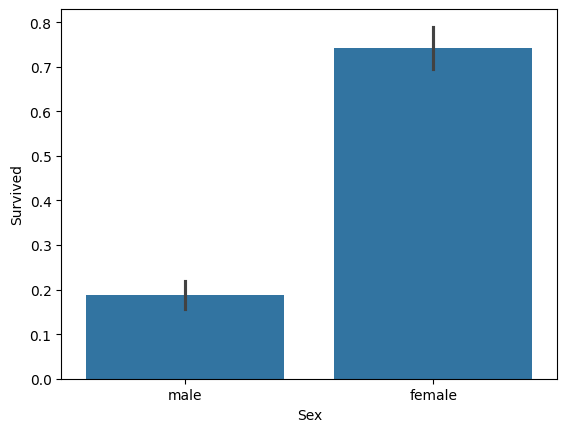

In [52]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

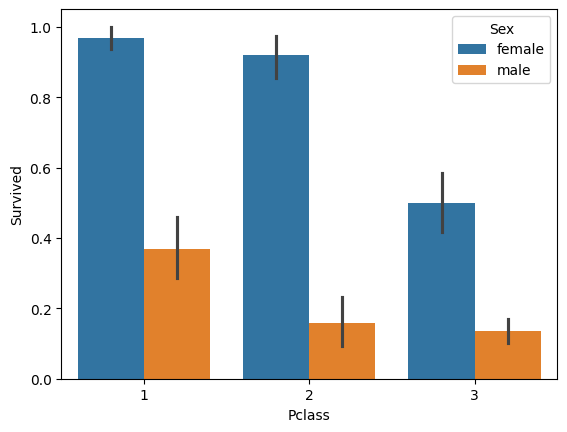

In [53]:
# 객실등급 별 성별에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

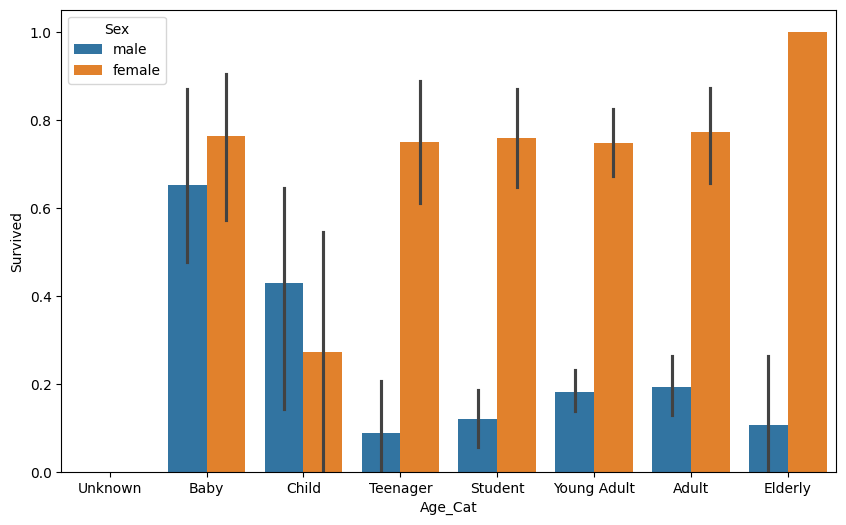

In [54]:
# 나이 범위별 성별에 따른 생존확률

# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용.
def get_category(age):
  cat=''
  if age <= -1: cat='Unknown'
  elif age <= 5: cat='Baby'
  elif age <= 12: cat='Child'
  elif age <= 18: cat='Teenager'
  elif age <= 25: cat='Student'
  elif age <= 35: cat='Young Adult'
  elif age <= 60: cat='Adult'
  else: cat='Elderly'
  return(cat)

# 막대 그래프의 figure 크기를 더 크게 설정
plt.figure(figsize=(10,6))

# x축 값을 순차적으로 표기하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda식 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(x)는 입력값으로 'Age'칼럼을 받아서 해당하는 cat값을 반환.
titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_Cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_Cat', axis=1, inplace=True)

In [55]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
# encode_features() 함수를 생성하여 문자열 카테고리 피처를 숫자형 카테고리 피처로 한번에 변환(레이블 인코드)하기
from sklearn.preprocessing import LabelEncoder

def encoder_features(dataDF):
  features = ['Sex', 'Cabin', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return(dataDF)

titanic_df = encoder_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


**데이터 전처리 작업 (한꺼번에)**

In [57]:
# Null값 처리하는 함수, 불필요한 피처 제거하는 함수, 문자열 카테고리 피처를 레이블 인코딩해주는 함수를 각각 생성하여 데이터의 전처리를 전체적으로 호출하는 함수 생성하기

# Null 처리 함수, fillna()
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return(df)

# 머신러닝 알고리즘에 불필요한 피처 제거하는 함수, drop_features()
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행하는 함수, format_features()
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출. transform_features()
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [58]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

**train_test_split( ) 이용해서 학습/테스트 데이터 분리 후,**

**DecisionTreeClassifier, RandomForestClassifier, LogisiticRegression 각각 이용해서 학습.예측.평가**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier로 학습.예측.평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier로 학습.예측.평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression로 학습.예측.평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8659


- **KFold( ) 이용해서 교차검증(학습.예측)하고 평가**

In [61]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):

  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 개수만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits=5)
  scores=[]

  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

    # X_titanic_df 데이터에서 교차검증별로 학습과 검증 데이터를 가르키는 index 생성.
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습.예측.정확도 계산.
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  # 5개의 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print('평균 정확도:{0:.4f}'.format(mean_score))

# exec_kfold 호출. DecisionTreeClassifier 알고리즘 채택.
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도:0.7823


- **cross_val_score( ) 이용해서 한번에 학습.예측.평가하기**

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


KFold와의 정확도가 다른 이유는 cross_val_score()이 KFold가 아닌 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.

- **GridSearchCV( ) 이용해서  fit 시킴으로써 최적의 파라미터를 찾은 후,**

  **그 특정 파라미터 모델로 예측.평가하기**


In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_

# GridSeachCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


최적호된 하이퍼 파라미터 조합으로 DecisionTreeClassifier를 학습시킨 뒤에 예측 정확도가 약 87.15%로 향상되었다. 이는 하이퍼 파라미터 변경 전보다 약 8% 증가한 결과인데, 일반적인 하이퍼 파라미터 튜닝으로 얻기 어려운 극단적인 증가 결과이다. 테스트용 테이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가된 것으로 보인다.